In [334]:


#! 还是看我那个自定义实现的类吧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [354]:
data=pd.read_csv('boston.csv')
print(data['chas']!=0.0)


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: chas, Length: 506, dtype: bool


In [356]:
x=data['crim']
print(x)#! 取出colum为crim的一列
print(x.to_numpy())#! 将x变为了一个向量

#! 正常情况下应该第一步画图分析 但是这个特征数据太多了 所以不好画图 我先尝试找一个特征进行画图 但是相关性不强
# one_param_data=data.loc[:,['crim','medv']]


#! 此处采用z-score归一化方法
# 由于两个特征的量纲不一样，因此需要进行归一化。此处采用z-score归一化方法（使用均值和方差进行归一化），并对特征和标签值一起标准化：
def normalize_feature(df)->pd.DataFrame:
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())



# one_param_data=normalize_feature(one_param_data)
# print(one_param_data)
# one_param_data=one_param_data.to_numpy()#! 转为二维ndarray
# x=one_param_data[:,0]
# yy=one_param_data[:,1]
# plt.scatter(x,yy)
# plt.show()
# #!只去这个特征 看不出有相关性 


def add_theta0(df: pd.DataFrame)->pd.DataFrame:
    #! 为了向量化 我们需要给常数项也配上一个所谓的位置数x=1
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # ones是m行1列的dataframe
    added_df = pd.concat([ones, df], axis=1)  # 拼接数据，根据列拼接
    return added_df



0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64
[6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58

In [337]:
# 读取特征


def get_x(df:pd.DataFrame)->np.ndarray: 
    '''
    获取特征列
    '''
    return df.iloc[:, :-1].to_numpy()  # 这个操作获取所有的特征列(即排除了target列)，返回 ndarray,不是矩阵

ones = pd.DataFrame({'ones': np.ones(len(data))})
print(ones)

print('-------------')

x = pd.concat([ones, data], axis=1)#! 函数的详细用法见注释
print(x)

print('-----------------')
print(x.iloc[:,:-1].to_numpy())


     ones
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
..    ...
501   1.0
502   1.0
503   1.0
504   1.0
505   1.0

[506 rows x 1 columns]
-------------
     ones     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0     1.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1     1.0  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2     1.0  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3     1.0  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4     1.0  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..    ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501   1.0  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502   1.0  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503   1.0  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504   1.0  0.10959   0.0  11.93     0  0.573  6.794 

In [338]:
# 读取标签
def get_y(df:pd.DataFrame)->np.ndarray:
    """
   假设最后一列是目标列
   获取目标列

   """
    return np.array(df.iloc[:, -1]) # df.iloc[:, -1]是指df的最后一列


In [339]:

#! 先划分再标准化!!!!!!!!!!
data_train=data[:400].copy()
data_train=normalize_feature(data_train)
#data=normalize_feature(data)
#! 注意必须先标准化 再add

data_train=add_theta0(data_train)


In [340]:
print(type(data_train))
print(data_train)
X=get_x(data_train)
print(X.shape,type(X))
Y=get_y(data_train)
print(Y.shape,type(Y))



<class 'pandas.core.frame.DataFrame'>
     ones      crim        zn     indus      chas       nox        rm  \
0     1.0 -0.291350  0.142729 -1.091318 -0.309274  0.069178  0.325424   
1     1.0 -0.287844 -0.565996 -0.360328 -0.309274 -0.536512  0.115532   
2     1.0 -0.287848 -0.565996 -0.360328 -0.309274 -0.536512  1.156814   
3     1.0 -0.286999 -0.565996 -1.111282 -0.309274 -0.633072  0.901945   
4     1.0 -0.280873 -0.565996 -1.111282 -0.309274 -0.633072  1.105022   
..    ...       ...       ...       ...       ...       ...       ...   
395   1.0  1.163351 -0.565996  1.333543 -0.309274  1.429787  0.183679   
396   1.0  0.688267 -0.565996  1.333543 -0.309274  1.429787  0.093726   
397   1.0  0.988874 -0.565996  1.333543 -0.309274  1.429787 -0.803085   
398   1.0  6.112604 -0.565996  1.333543 -0.309274  1.429787 -1.203787   
399   1.0  1.363726 -0.565996  1.333543 -0.309274  1.429787 -0.659977   

          age       dis       rad       tax   ptratio     black     lstat  \
0    0.0

In [341]:

#! 构造参数向量theta
# 由线性回归假设函数可知，参数向量的维数是原始数据集的特征数+截距项(常数项)的特征数

theta = np.zeros(X.shape[1]) # theta的个数就是X的列数 theta是每个变量前面的系数
print(theta)
#! 注意 X的列数是原来数据集中特征的种类加1 X的行数就是样本的数量



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [342]:

# !定义代价函数
def lr_cost(theta, X: np.ndarray, y: np.ndarray):
    '''
    :param theta: 维度是R(n)，是线性回归的参数
    :param X: 维度是R(m*n)，m为样本数，n为特征数
    :param y:维度是R(m)
    :return:
    '''
    m = X.shape[0]  # m为样本数
    # 计算每个样本的每个特征与对应参数的乘积
    inner = X.dot(theta) - y  # X.dot(theta)等价于np.dot(X,theta)，inner的维度是R(m*1)
    # 计算代价函数里的平方，然后求和，需要注意：
    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = np.dot(inner.T, inner)#! 等号右侧其实就是计算了平方的和
    # square_sum维度是R(1*1) 一个数
    cost = square_sum / (2 * m)
    return cost

#! 向量之间dot 是内积 是相乘之后再相加
#! 矩阵之间 是矩阵乘法
#! 矩阵x为m×n阶，向量y为n阶向量，则矩阵x和向量y可以进行乘法运算，结果为m阶向量。进行运算时，会首先将后面一项进行自动转置操作，之后再进行乘法运算。
# a=np.arange(1,11).reshape((2,5))
# b=np.ones(5)
# print(a.dot(b))

In [343]:
lr_cost(theta, X, Y) # 试一试初始的参数对应的代价是多少


0.4987500000000003

In [344]:

#! 梯度下降+拟合
#https://blog.csdn.net/kingsure001/article/details/107465231
# 其中是α学习率，它决定了我们沿着能让代价函数下降程度最大的方向
# 向下迈出的步子有多大 通常可以考虑尝试些学习率：𝛼 = 0.01，0.03，0.1，0.3，1，3，10

# 先定义辅助函数来计算梯度下降更新公式中的求和部分
def gradient(theta, X:np.ndarray, y):
    '''
    :param theta: 维度是R(n)，是线性回归的参数
    :param X: 维度是R(m*n)，m为样本数，n为特征数
    :param y: 维度是R(m)
    :return:维度是R(n+1,1)，即与参数向量theta同维度
    '''
    m = X.shape[0]
    inner = np.dot(X.T, (np.dot(X, theta) - y))#dot中第二个参数是差值向量
    return inner / m

# 批量梯度下降函数
def batch_gradient_decent(theta, X, Y, epoch, alpha=0.01):
    '''
    :param theta: 维度是R(n)，是线性回归的参数
    :param X: 维度是R(m*n)，m为样本数，n为特征数
    :param y: 维度是R(m)
    :param epoch: 批处理的轮数
    :param alpha: 学习率，即梯度下降更新公式里的alpha
    :return: 拟合线性回归,返回参数和代价
    '''
    cost_data = [lr_cost(theta, X, Y)]#! 记录每次移动之后的代价值 我们目的是通过可视化 来找到最小的cost所对应的theta
    _theta = theta.copy()  # 拷贝一份，不和原来的theta混淆

    for _ in range(epoch):
        #! 公式
        _theta = _theta - alpha * gradient(_theta, X, Y)
        #! 记录cost
        cost_data.append(lr_cost(_theta, X, Y))

    return _theta, cost_data


In [350]:

#! 初始化参数 调用函数
alpha = 0.01 # 学习率  画图找到最优的学习率
theta = np.zeros(X.shape[1]) # X.shape[1]：特征数n  构造所要求的未知数向量

epoch = 500 # 训练轮数 大点好？#! 实际上cost_data里面有501个 因为初始的时候(此时还没有训练)还有一个cost

final_theta,cost_data=batch_gradient_decent(theta,X,Y,epoch,alpha)
print(final_theta)#,cost_data)#! 参数向量的第一个分量是常数项
print(cost_data)
# final_theta 即为结果 查看最终的参数向量值（由于特征超过两个，就无法用二维平面图来直观查看拟合的曲线了）

[ 1.45405910e-15 -9.48585082e-02  7.71017262e-02 -2.11029121e-02
  6.84268883e-02 -8.84813619e-02  4.18000229e-01 -4.61421511e-03
 -2.36973404e-01  1.65510232e-01 -7.01963128e-02 -1.76307471e-01
  1.49074043e-02 -3.76503907e-01]
[0.4987500000000003, 0.48013513212935544, 0.463006546176193, 0.44721971667198007, 0.43264507865451024, 0.41916645197149455, 0.4066796323141281, 0.39509113131648077, 0.38431704992861276, 0.37428207094493177, 0.36491855806555923, 0.3561657502061216, 0.34796904096726533, 0.3402793342443281, 0.333052467913411, 0.3262486983846127, 0.3198322395771296, 0.31377085055390785, 0.30803546666412085, 0.3025998695876293, 0.2974403921636025, 0.29253565432178397, 0.28786632682494345, 0.2834149198797822, 0.27916559398532237, 0.27510399066653435, 0.2712170809901413, 0.26749302998231905, 0.263921075267175, 0.26049141842295326, 0.2571951277121047, 0.25402405098368097, 0.2509707376737563, 0.24802836894333077, 0.2451906950948802, 0.24245197949963576, 0.2398069483489747, 0.23725074561

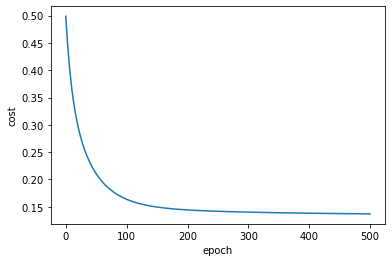

In [346]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(range(501),cost_data)#! 已知x y轴 进行画曲线图
plt.show()

[1.00000000e-01 4.64158883e-03 2.15443469e-04 1.00000000e-05]
[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


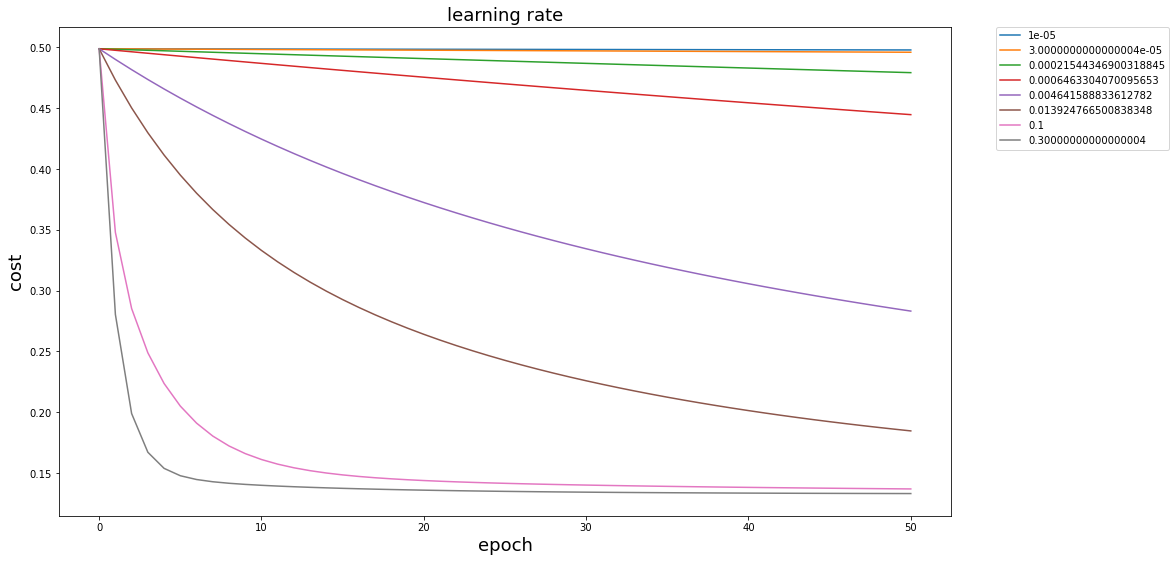

In [347]:
epoch=50
# 产生不同的学习率
base = np.logspace(-1, -5, num=4) #指定起始及结束值，并指定个数，默认以10为底。该方法的详细用法见参考文章
print(base)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)


fig, ax = plt.subplots(figsize=(16, 9)) # 生成画布
# 遍历每一个学习率
for alpha in candidate:
    # 使用当前学习率拟合数据，计算迭代过程中的代价值
    _, cost_data = batch_gradient_decent(theta, X, Y, epoch, alpha=alpha)
    # 绘制当前学习率之下的代价值的变化情况
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()





In [348]:



#todo 利用已经训练好的模型来预测test数据集
data_test=data[400:].copy()
#! 先划分再标准化!!!!!!!!!!

data_test=normalize_feature(data_test)
#data=normalize_feature(data)
#! 注意必须先标准化 再add

data_test=add_theta0(data_test)

#inner = X.dot(theta) - y  # X.dot(theta)等价于np.dot(X,theta)，inner的维度是R(m*1)
y_test=get_y(data_test)
x_test=get_x(data_test)

#! 我们使用训练好的final_theta
print(lr_cost(final_theta,x_test,y_test))

#! 均方误差为0.1625942709033656
#! 估计的均方误差越小越好

nan


In [349]:

# #! 下面尝试降维
# from sklearn.decomposition import PCA
# feature_x=get_x(data)
# score=0
# best_x=0
# for x in range(1,14):
    
#     pca=PCA(n_components=x)
#     pca.fit(feature_x)
#     X=pca.transform(Xs)
#     reg.fit(X,y)
#     if score<=reg.score(X,y):
#         best_x=x
#         score=reg.score(X,y)
#         print(best_x,score)
        
# print('===============')   
# print(best_x,score)

# pca=PCA(n_components=1)
# pca.fit(X)
# print(pca.transform(X))